### Do it! 실습 | 변수 조합해 파생변수 만들기

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({
    'var1' : [4, 3, 8],
    'var2' : [2, 6, 1]
})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [6]:
df['var_sum'] = df['var1'] + df['var2'] # var_sum 파생변수 만들기
df

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [7]:
df['var_mean'] = (df['var1'] + df['var2']) / 2 # var_mean 파생변수 만들기
df

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


### Do it! 실습 | mpg 통합 연비 변수 만들기

In [9]:
# mpg 데이터 불러오기
mpg = pd.read_csv('C:/Users/camar/OneDrive/바탕 화면/We_IT_5th/We_IT/Data/mpg.csv')

In [10]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2 # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [11]:
sum(mpg['total']) / len(mpg) # total 합계를 행 수로 나누기

20.14957264957265

In [12]:
mpg['total'].mean() # 통합 연비 변수 평균

20.14957264957265

### Do it! 실습 | 조건문을 활용해 파생변수 만들기

In [13]:
mpg['total'].describe() # 요약 통계량 출력

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

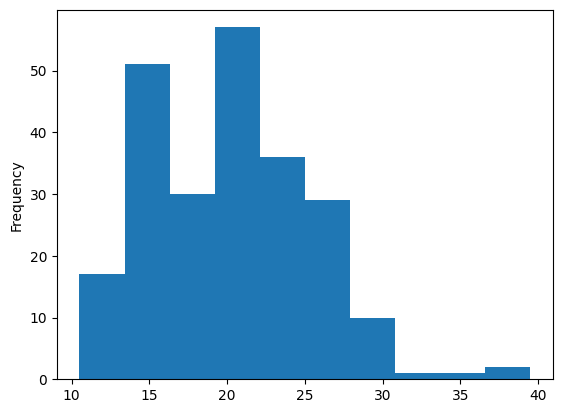

In [14]:
mpg['total'].plot.hist()

In [15]:
import numpy as np

In [16]:
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


In [17]:
mpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

In [18]:
count_test = mpg['test'].value_counts() # 연비 합격 빈도표를 변수에 할당

<AxesSubplot:>

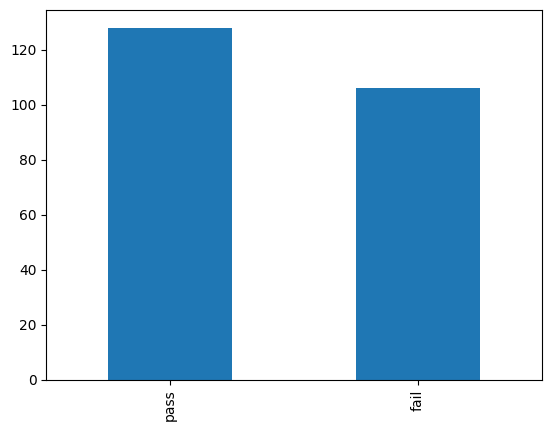

In [19]:
count_test.plot.bar() # 연비 합격 빈도 막대 그래프 만들기

In [20]:
# total 기준으로 A, B, C 부여
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
                        np.where(mpg['total'] >= 20, 'B', 'C'))

# 데이터 확인
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


<AxesSubplot:>

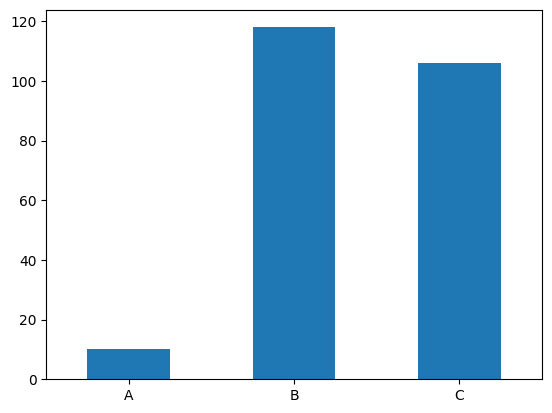

In [22]:
count_grade = mpg['grade'].value_counts().sort_index() # 등급 빈도표 만들기
count_grade.plot.bar(rot = 0)  

### Do it! 실습 | 목록에 해당하는 행으로 변수 만들기

In [23]:
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'),
                       'small', 'large')

mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

In [24]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')

mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64